<a href="https://colab.research.google.com/github/amitya369/data_science/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

!pip install --upgrade yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start = '2000-12-31'
end = '2024-10-01'
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,0.224314,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,0.246934,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,0.257302,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,0.246934,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,0.249761,373699200


In [ ]:
df.reset_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,0.224314,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,0.246934,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,0.257302,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,0.246934,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,0.249761,373699200


In [ ]:
df = df.drop(['Adj Close'] , axis = 1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,373699200


In [ ]:
# prompt: remove Date column from above dataset

df = df.reset_index()
df = df.drop(['Date'], axis=1)
df.head()


,Open,High,Low,Close,Volume
0,0.265625,0.272321,0.260045,0.265625,452312000
1,0.258929,0.297991,0.257813,0.292411,817073600
2,0.323940,0.330357,0.300223,0.304688,739396000
3,0.302455,0.310268,0.286830,0.292411,412356000
4,0.302455,0.303292,0.284598,0.295759,373699200


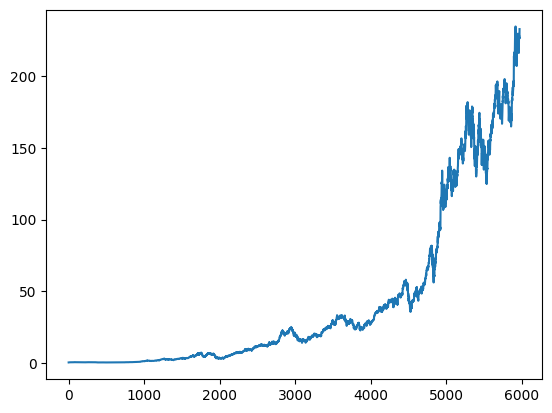

In [ ]:
plt.plot(df.Close)

In [ ]:
df


,Open,High,Low,Close,Volume
0,0.265625,0.272321,0.260045,0.265625,452312000
1,0.258929,0.297991,0.257813,0.292411,817073600
2,0.323940,0.330357,0.300223,0.304688,739396000
3,0.302455,0.310268,0.286830,0.292411,412356000
4,0.302455,0.303292,0.284598,0.295759,373699200
...,...,...,...,...,...
5968,228.649994,229.350006,225.729996,227.369995,43556100
5969,224.929993,227.289993,224.020004,226.369995,42308700
5970,227.300003,228.500000,225.410004,227.520004,36636700
5971,228.460007,229.520004,227.300003,227.789993,34026000


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5968,212.2568
5969,212.7902
5970,213.2316
5971,213.6924


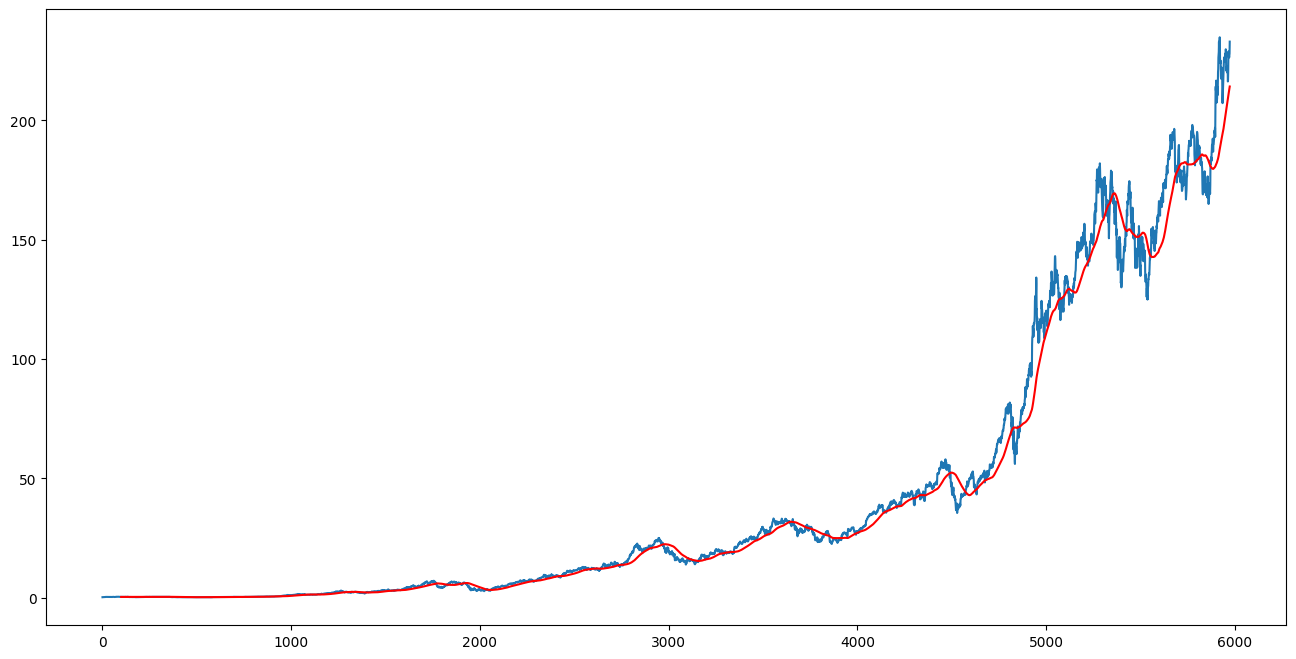

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5968,196.68845
5969,196.84895
5970,197.00800
5971,197.18105


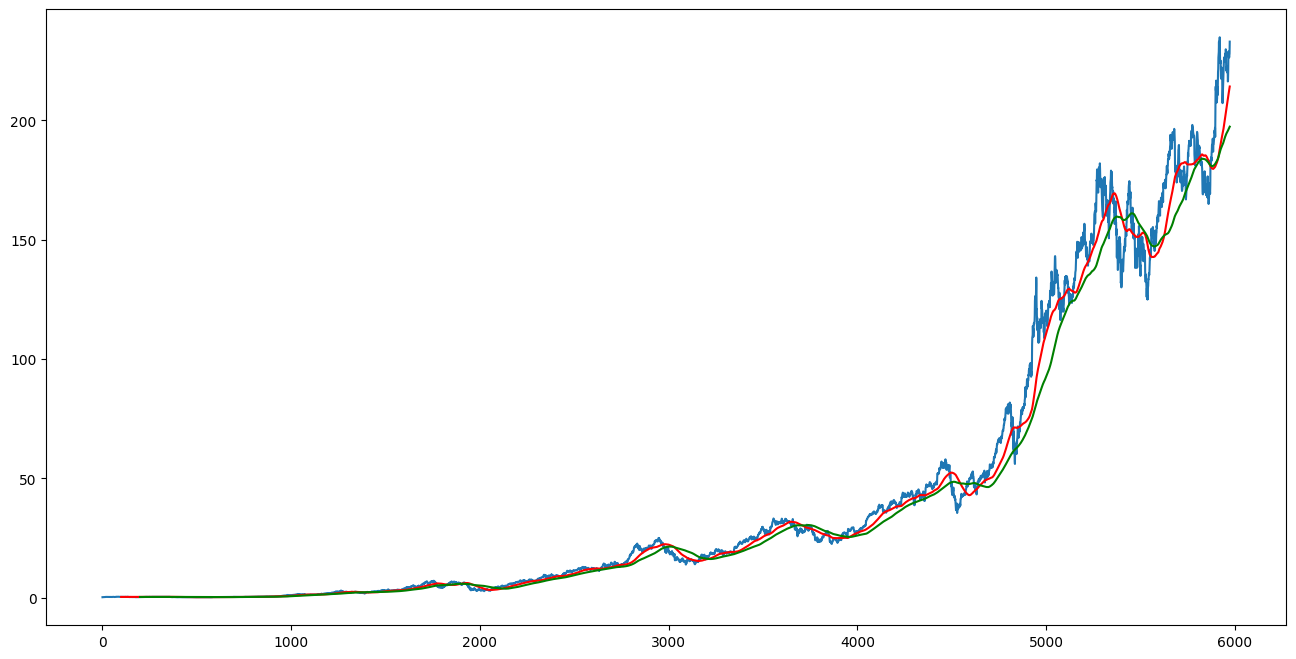

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(5973, 5)

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4181, 1)
(1792, 1)


In [ ]:
data_training.head()

,Close
0,0.265625
1,0.292411
2,0.304688
3,0.292411
4,0.295759


In [ ]:
data_testing.head()

,Close
4181,40.237499
4182,39.465000
4183,39.375000
4184,39.302502
4185,39.945000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[7.80242658e-04],
       [1.44712981e-03],
       [1.75278867e-03],
       ...,
       [9.74356175e-01],
       [9.89107626e-01],
       [1.00000000e+00]])

In [ ]:
data_training_array.shape

(4181, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

In [ ]:
import numpy as np

x_train = np.array(x_train)
x_train.shape

(4081, 100, 1)

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss = 'mean_squared_error') # corrected spelling of 'mean_squared_error'
model.fit(x_train , y_train, epochs = 50 )

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 45s 289ms/step - loss: 0.0439
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 44s 310ms/step - loss: 0.0045
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 293ms/step - loss: 0.0038
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 36s 281ms/step - loss: 0.0035
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 43s 294ms/step - loss: 0.0038
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 40s 285ms/step - loss: 0.0033
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 44s 306ms/step - loss: 0.0031
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - loss: 0.0038
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 43s 310ms/step - loss: 0.0030
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 36s 281ms/step - loss: 0.0027
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 35s 277ms/step - loss: 0.0026
Epoch 12/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - loss: 0.0025
Epoch 13/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 38s 295ms/step - loss: 0.0027
Epoch 14/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 277ms/step - loss: 0.0024
Epoch 15/50
128

In [30]:
model.save('keras_model.h5')

In [31]:
data_testing.head()

,Close
4181,40.237499
4182,39.465000
4183,39.375000
4184,39.302502
4185,39.945000


In [32]:
data_training.tail(100)

,Close
4081,35.160000
4082,35.220001
4083,35.950001
4084,36.029999
4085,35.982498
...,...
4176,40.264999
4177,38.830002
4178,39.369999
4179,39.962502


In [33]:
past_100_days = data_training.tail(100)

In [34]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,35.160000
1,35.220001
2,35.950001
3,36.029999
4,35.982498


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [3.00517735e-04],
       [3.95673087e-03],
       ...,
       [9.63437830e-01],
       [9.64790074e-01],
       [9.90884467e-01]])

In [36]:
input_data.shape

(1892, 1)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1792, 100, 1)
(1792,)


In [39]:
y_predicted = model.predict(x_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step


In [40]:
y_predicted.shape

(1792, 1)

In [41]:
y_test

array([0.02543073, 0.02156166, 0.02111089, ..., 0.96343783, 0.96479007,
       0.99088447])

In [42]:
y_predicted

array([[0.04140249],
       [0.04186179],
       [0.04234417],
       ...,
       [0.90885425],
       [0.91229016],
       [0.9147872 ]], dtype=float32)

In [43]:
scaler.scale_

array([0.00500851])

In [44]:
scale_factor = 1/0.00500851
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

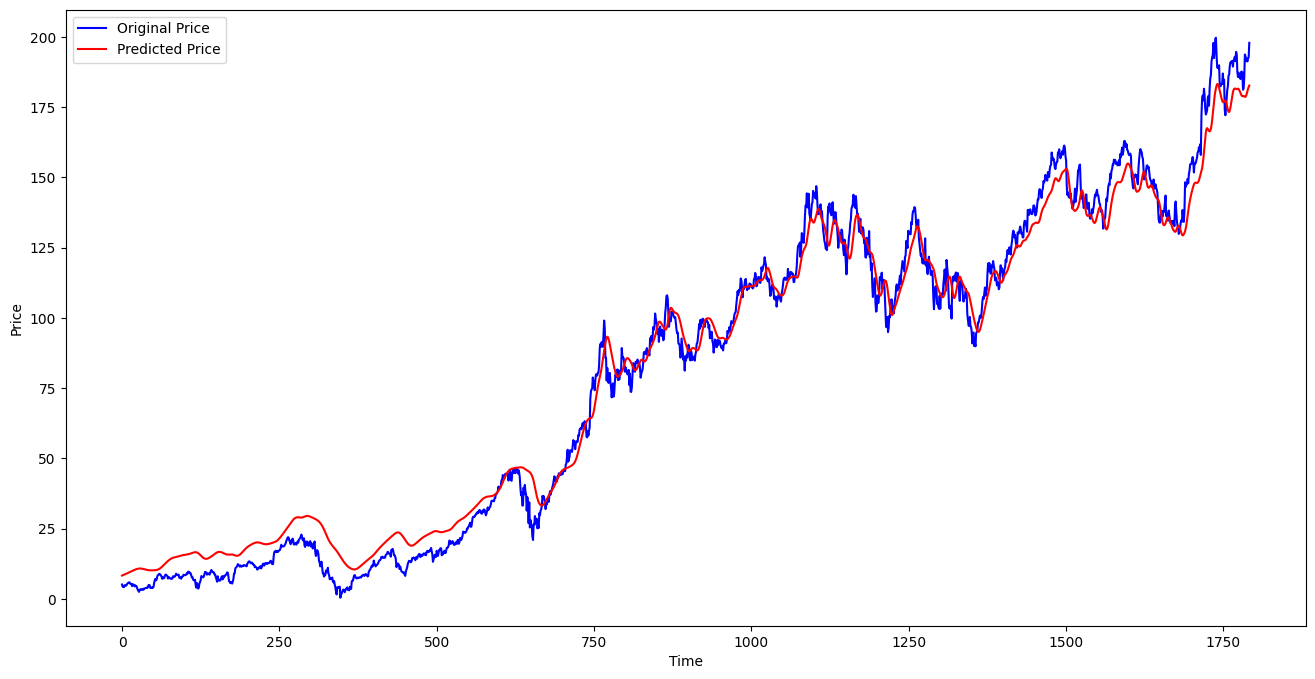

In [45]:
plt.figure(figsize=(16,8))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error (RMSE):', rmse)

mae = mean_absolute_error(y_test, y_predicted)
print('Mean Absolute Error (MAE):', mae)

r2 = r2_score(y_test, y_predicted)
print('R-squared:', r2)


Root Mean Squared Error (RMSE): 7.064923712116224
Mean Absolute Error (MAE): 5.858540831011216
R-squared: 0.984698108015587
